# 导入packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib
from matplotlib.patches import ConnectionPatch
import matplotlib.gridspec as gridspec
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
matplotlib.rcParams['text.usetex'] = True

# 设置颜色列表

In [2]:
colors = [
    [233/256,	110/256, 236/256], # #e96eec
    # [0.6, 0.6, 0.2],  # olive
    # [0.5333333333333333, 0.13333333333333333, 0.3333333333333333],  # wine
    [255/255, 165/255, 0],
    # [0.8666666666666667, 0.8, 0.4666666666666667],  # sand
    # [223/256,	73/256,	54/256], # #df4936
    [107/256,	161/256,255/256], # #6ba1ff
    [0.6, 0.4, 0.8], # amethyst
    [0.0, 0.0, 1.0], # ao
    [0.55, 0.71, 0.0], # applegreen
    # [0.4, 1.0, 0.0], # brightgreen
    [0.99, 0.76, 0.8], # bubblegum
    [0.93, 0.53, 0.18], # cadmiumorange
    [11/255, 132/255, 147/255], # deblue
    [204/255, 119/255, 34/255], # {ocra}
]
colors = np.array(colors)

# 设置超参数与导入数据

In [3]:
methods = ['ES+ICNN', 'ES+Quad', 'AS'] #所用方法名字，此处仅起到演示作用，无实际含义
sc_step = 10 # 时间分辨率
X = torch.from_numpy(np.random.normal(0,0.1,[20,30000,2]))[:,0:-1:sc_step] 
Y = torch.from_numpy(np.random.normal(0,0.1,[20,30000,2]))[:,0:-1:sc_step] 
Z = torch.from_numpy(np.random.normal(0,0.1,[20,30000,2]))[:,0:-1:sc_step] 
W = torch.from_numpy(np.random.normal(0,0.1,[20,30000,2]))[:,0:-1:sc_step] 
'''
数据X,Y,Z,W分别对应原系统，ES+ICNN，ES+Quad,AS 控制方法的实验结果，为三维tensor格式，第一个位置表示随机样本数，第二个位置表示时间长度，
第三个位置对应动力系统的变量
'''

'\n数据X,Y,Z,W分别对应原系统，ES+ICNN，ES+Quad,AS 控制方法的实验结果，为三维tensor格式，第一个位置表示随机样本数，第二个位置表示时间长度，\n第三个位置对应动力系统的变量\n'

In [4]:
target_big_X_lim = [24000.0 / sc_step, 30000.0 /sc_step] #画子图用到的时刻
target_small_X_lim = [0.0, 6000.0 / sc_step] #画子图用到的时刻

mid_init = 24000 // sc_step #Start of small time
mid_end =  30000 // sc_step #End of small time


alpha = 0.1 # 阴影度
fontsize = 35 # 字体大小
fontsize_legend = 17 # 图例字体大小
framealpha = 0.7 # 图例阴影度
legend_loc = "lower right" # 图例位置
shade_color = colors[0] # 阴影颜色
labelpad=-30 # 标签离坐标轴的距离
linewidth = 3 # 线的粗细度



x1_ylim = [-20, 20] # 设置主图的上下边界

# 该函数用于添加虚线格点和背景色，可自行调整

In [5]:
def plot_grid():
    plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
    # minor grid lines
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
    # plt.grid(b=True, which='both', color='beige', alpha=0.1, ls='-', lw=1)
    pass

# 定义主要画图函数

In [6]:
def plt_x1_ylim():
    plt.ylim(x1_ylim[0], x1_ylim[1])

def plt_tick_time_0_to_3():
    # time [2.4, 3.0]
    plt.xlim(-1500.0 / sc_step, 31500.0 / sc_step)
    plt.xticks([0.0, 10000.0 / sc_step, 20000.0 / sc_step, 30000.0 / sc_step], ["$0$", "$1.0$", "$2.0$", "$3.0$"])
    # plt.xticks([0.0, 10000.0, 20000.0, 30000.0], ["$0$", "$~$", "$~$", "$3.0$"])

def plt_tick_time_24_to_30(case=1):
    # time [2.4, 3.0]
    # plt.xlim(-300, 6300)
    plt.xlim(0, 6000/sc_step)
    plt.xticks([0.0, 2000.0/sc_step, 4000.0/sc_step, 6000.0/sc_step], ["$2.4$", "$2.6$", "$2.8$", "$3.0$"])
    # plt.xticks([0.0, 2000.0, 4000.0, 6000.0], ["$2.4$", "$~$", "$~$", "$3.0$"])
    if case==1:
        # plt.ylim(-0.115, 0.115)
        # plt.yticks([-0.1, -0.05, 0, 0.05, 0.1], ["$-0.1$", "$~$", "$0$", "$~$", "$0.1$"])
        plt.ylim(-0.23, 0.23)
        plt.yticks([-0.2, -0.1, 0, 0.1, 0.2], ["$-0.2$", "$~$", "$0$", "$~$", "$0.2$"])
    if case==2:
        plt.ylim(-0.23, 0.23)
        plt.yticks([-0.2, -0.1, 0, 0.1, 0.2], ["$-0.2$", "$~$", "$0$", "$~$", "$0.2$"])

def plot_x1(subfig=1):
    X1 = X[:,:,0]#x1 component of original system
    mean_x1 = torch.mean(X1,0)
    std_x1 = torch.std(X1,0)
    Y1 = Y[:,:,0]#x1 component of ES(+ICNN)
    mean_y1 = torch.mean(Y1,0)
    std_y1 = torch.std(Y1,0)
    Z1 = Z[:,:,0]#x1 component of ES(+Quadratic)
    mean_z1 = torch.mean(Z1,0)
    std_z1 = torch.std(Z1,0)
    W1 = W[:,:,0]#x1 component of AS
    mean_w1 = torch.mean(W1,0)
    std_w1 = torch.std(W1,0)


    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

    if subfig==1:
        # plt.subplot(251)
        plt.fill_between(np.arange(X1.size(1)),mean_x1-std_x1,mean_x1+std_x1,color='r',alpha=alpha)
        plt.plot(np.arange(X1.size(1)),mean_x1,color='r',alpha=0.5,label=r"$x_1$", linewidth=linewidth)
        # plt.title('Original System', fontsize=fontsize)
        plt_tick_time_0_to_3()
        # plt.ylabel(r"$x_1$", fontsize=fontsize)
        # plt.xlabel("Time", fontsize=fontsize)
        plt.tick_params(labelsize=fontsize)

    if subfig==2:
        # plt.subplot(232)
        plt.fill_between(np.arange(Y1.size(1)),mean_y1-std_y1,mean_y1+std_y1,color='r',alpha=alpha)
        plt.plot(np.arange(Y1.size(1)),mean_y1,color='r',alpha=0.5,label=methods[0], linewidth=linewidth)
        plt.fill_between(np.arange(mean_z1.size(0)),mean_z1-std_z1,mean_z1+std_z1,color='b',alpha=alpha)
        plt.plot(np.arange(mean_z1.size(0)),mean_z1,color='b',alpha=0.5,label=methods[1], linewidth=linewidth)
        plt.fill_between(np.arange(W1.size(1)),mean_w1-std_w1,mean_w1+std_w1,color='g',alpha=alpha)
        plt.plot(np.arange(W1.size(1)),mean_w1,color='g',alpha=0.5,label=methods[2], linewidth=linewidth)
        plt.legend(fontsize=fontsize_legend, framealpha=framealpha, loc=legend_loc)
        # plt.title('ES(ICNN), ES(Quad), AS')
        plt.xlabel("Time", fontsize=fontsize)
        plt_tick_time_0_to_3()
        plt_x1_ylim()
        plt.tick_params(labelsize=fontsize)

    if subfig==3:
        # plt.subplot(233)
        #Tune time
        mean_y1 = mean_y1[mid_init:mid_end]
        std_y1 = std_y1[mid_init:mid_end]
        mean_z1 = mean_z1[mid_init:mid_end]
        std_z1 = std_z1[mid_init:mid_end]
        mean_w1 = mean_w1[mid_init:mid_end]
        std_w1 = std_w1[mid_init:mid_end]
        plt.fill_between(np.arange(mean_y1.size(0)),mean_y1-std_y1,mean_y1+std_y1,color='r',alpha=alpha)
        plt.plot(np.arange(mean_y1.size(0)),mean_y1,color='r',alpha=0.5,label='mean value', linewidth=linewidth)
        plt.fill_between(np.arange(mean_z1.size(0)),mean_z1-std_z1,mean_z1+std_z1,color='b',alpha=alpha)
        plt.plot(np.arange(mean_z1.size(0)),mean_z1,color='b',alpha=0.5,label='mean value', linewidth=linewidth)
        plt.fill_between(np.arange(mean_w1.size(0)),mean_w1-std_w1,mean_w1+std_w1,color='g',alpha=alpha)
        plt.plot(np.arange(mean_w1.size(0)),mean_w1,color='g',alpha=0.5,label='mean value', linewidth=linewidth)
        # plt.title('Time Magnify : [2.4,3.0]')
        plt_tick_time_24_to_30(case=1)
        plt.tick_params(labelsize=fontsize)


def plot_x2(subfig=1):
    #Plot x2 component
    mean_x1 = torch.mean(X[:,:,1],0)
    std_x1 = torch.std(X[:,:,1],0)
    mean_y1 = torch.mean(Y[:,:,1],0)
    std_y1 = torch.std(Y[:,:,1],0)
    mean_z1 = torch.mean(Z[:,:,1],0)
    std_z1 = torch.std(Z[:,:,1],0)
    mean_w1 = torch.mean(W[:,:,1],0)
    std_w1 = torch.std(W[:,:,1],0)

    if subfig==1:
        # plt.subplot(256)
        plt.fill_between(np.arange(mean_x1.size(0)),mean_x1-std_x1,mean_x1+std_x1,color='g',alpha=alpha)
        plt.plot(np.arange(mean_x1.size(0)),mean_x1,color='g',alpha=0.5,label=r"$x_2$", linewidth=linewidth)
        # plt.ylabel(r"$x_2$", fontsize=fontsize)
        # plt.xlabel("Time", fontsize=fontsize)
        plt_tick_time_0_to_3()
        plt.tick_params(labelsize=fontsize)

    if subfig==2:
        # plt.subplot(235)
        plt.fill_between(np.arange(mean_y1.size(0)),mean_y1-std_y1,mean_y1+std_y1,color='r',alpha=alpha)
        plt.plot(np.arange(mean_y1.size(0)),mean_y1,color='r',alpha=0.5,label=methods[0], linewidth=linewidth)
        plt.fill_between(np.arange(mean_z1.size(0)),mean_z1-std_z1,mean_z1+std_z1,color='b',alpha=alpha)
        plt.plot(np.arange(mean_z1.size(0)),mean_z1,color='b',alpha=0.5,label=methods[1], linewidth=linewidth)
        plt.fill_between(np.arange(mean_w1.size(0)),mean_w1-std_w1,mean_w1+std_w1,color='g',alpha=alpha)
        plt.plot(np.arange(mean_w1.size(0)),mean_w1,color='g',alpha=0.5,label=methods[2], linewidth=linewidth)
        plt.xlabel("Time", fontsize=fontsize)
        plt_tick_time_0_to_3()
        plt.legend(fontsize=fontsize_legend, framealpha=framealpha, loc=legend_loc)
        plt_x1_ylim()
        plt.tick_params(labelsize=fontsize)

    if subfig==3:
        # plt.subplot(236)
        #Tune time
        mean_y1 = mean_y1[mid_init:mid_end]
        std_y1 = std_y1[mid_init:mid_end]
        mean_z1 = mean_z1[mid_init:mid_end]
        std_z1 = std_z1[mid_init:mid_end]
        mean_w1 = mean_w1[mid_init:mid_end]
        std_w1 = std_w1[mid_init:mid_end]

        plt.fill_between(np.arange(mean_y1.size(0)),mean_y1-std_y1,mean_y1+std_y1,color='r',alpha=alpha)
        plt.plot(np.arange(mean_y1.size(0)),mean_y1,color='r',alpha=0.5,label='mean value', linewidth=linewidth)
        plt.fill_between(np.arange(mean_z1.size(0)),mean_z1-std_z1,mean_z1+std_z1,color='b',alpha=alpha)
        plt.plot(np.arange(mean_z1.size(0)),mean_z1,color='b',alpha=0.5,label='mean value', linewidth=linewidth)
        plt.fill_between(np.arange(mean_w1.size(0)),mean_w1-std_w1,mean_w1+std_w1,color='g',alpha=alpha)
        plt.plot(np.arange(mean_w1.size(0)),mean_w1,color='g',alpha=0.5,label='mean value', linewidth=linewidth)
        # plt.xlabel("Time", fontsize=fontsize)
        plt_tick_time_24_to_30(case=2)
        plt.tick_params(labelsize=fontsize)

# 画图

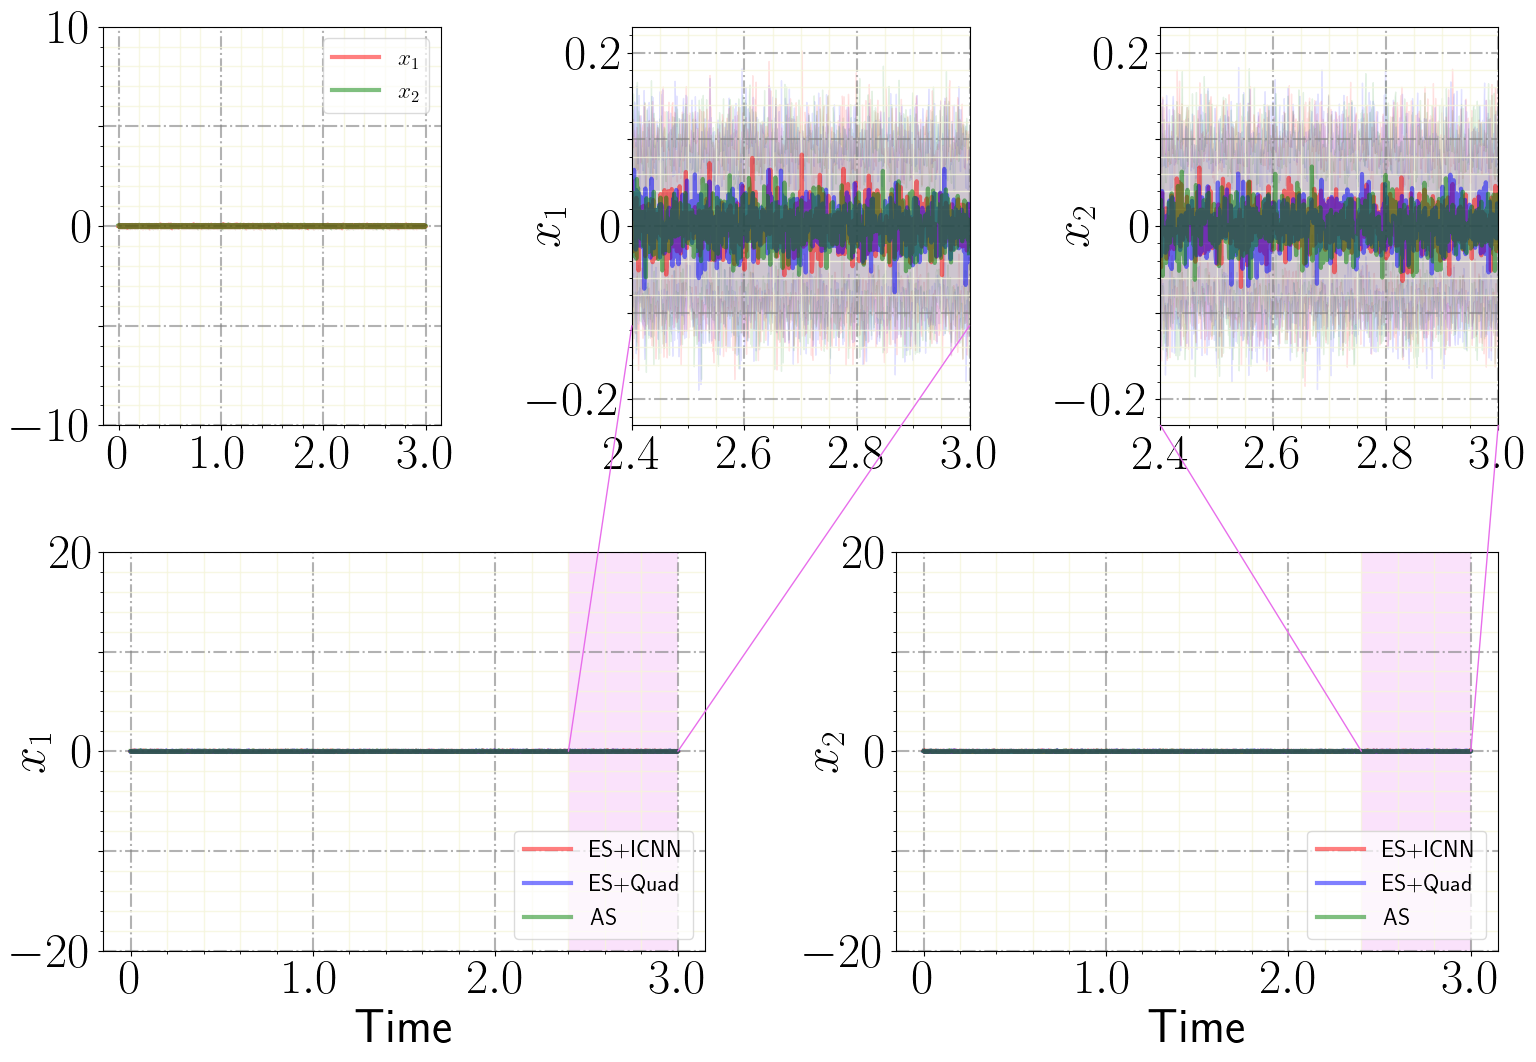

In [7]:
if __name__ == "__main__":
    gs = gridspec.GridSpec(16, 16)



    fig = plt.figure(figsize=(18, 12))
    # plt.subplot(231)
    plt.subplot(gs[0:7, 0:4])

    plot_x1(subfig=1)
    plot_x2(subfig=1)
    plt.legend(fontsize=fontsize_legend, framealpha=framealpha)
    plot_grid()

    plt.ylim(-10, 10)
    plt.yticks([-10, -5, 0, 5, 10], ["$-10$", "$~$", "$0$", "$~$", "$10$"])


    # sub_x1 = plt.subplot(223)
    sub_x1 = plt.subplot(gs[9:16, 0:7])
    plot_x1(subfig=2)
    plt.ylabel('$x_1$', fontsize=fontsize, labelpad=labelpad)
    sub_x1.fill_between((target_big_X_lim[0],target_big_X_lim[1]), -20, 30, facecolor=shade_color, alpha=0.2)
    plot_grid()
    plt.ylim(-20, 20)
    plt.yticks([-20, -10, 0, 10, 20], ["$-20$", "$~$", "$0$", "$~$", "$20$"])

    a = 0.47
    # sub_x1_small = fig.add_axes([a, 0.58, 0.1, 0.1])
    # sub_x1_small = plt.subplot(232)
    sub_x1_small = plt.subplot(gs[0:7, 6:10])


    plt.ylabel('$x_1$', fontsize=fontsize, labelpad=labelpad)

    # a, b = 5, 10
    # sub_x1_small = plt.subplot(a, b, 2*b + b//2)
    plot_x1(subfig=3)
    plot_grid()

    con1 = ConnectionPatch(xyA=(target_big_X_lim[0], 0), coordsA=sub_x1.transData,
                           xyB=(target_small_X_lim[0], -0.23/2), coordsB=sub_x1_small.transData, color =shade_color)
    fig.add_artist(con1)
    con2 = ConnectionPatch(xyA=(target_big_X_lim[1], 0), coordsA=sub_x1.transData,
                           xyB=(target_small_X_lim[1], -0.23/2), coordsB=sub_x1_small.transData, color =shade_color)
    fig.add_artist(con2)



    # plt.subplot(256)
    # plot_x2(subfig=1)
    # sub_x1 = plt.subplot(224)
    sub_x1 = plt.subplot(gs[9:16, 9:16])

    plot_x2(subfig=2)
    sub_x1.fill_between((target_big_X_lim[0],target_big_X_lim[1]), -20, 30, facecolor=shade_color, alpha=0.2)
    plot_grid()
    plt.ylabel('$x_2$', fontsize=fontsize, labelpad=labelpad)
    plt.ylim(-20, 20)
    plt.yticks([-20, -10, 0, 10, 20], ["$-20$", "$~$", "$0$", "$~$", "$20$"])


    # sub_x1_small = plt.subplot(233)
    sub_x1_small = plt.subplot(gs[0:7, 12:16])


    plot_x2(subfig=3)
    plot_grid()
    plt.ylabel('$x_2$', fontsize=fontsize, labelpad=labelpad)

    con1 = ConnectionPatch(xyA=(target_big_X_lim[0], 0), coordsA=sub_x1.transData,
                           xyB=(target_small_X_lim[0], -0.23), coordsB=sub_x1_small.transData, color =shade_color)
    fig.add_artist(con1)
    con2 = ConnectionPatch(xyA=(target_big_X_lim[1], 0), coordsA=sub_x1.transData,
                           xyB=(target_small_X_lim[1], -0.23), coordsB=sub_x1_small.transData, color =shade_color)
    fig.add_artist(con2)

    plt.show()